In [1]:
# import packages
!pip install dmba
import dmba
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


In [2]:
# load dataset
voter_df = pd.read_csv('FX_indicators_2020.csv', on_bad_lines='skip')

In [3]:
voter_df.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
voter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [5]:
column_names = voter_df.columns.tolist()
column_names

['VOTER_ID',
 'SET_NO',
 'OPP_SEX',
 'AGE',
 'HH_ND',
 'HH_NR',
 'HH_NI',
 'MED_AGE',
 'MED_AGE_M',
 'MED_AGE_F',
 'NH_WHITE',
 'NH_AA',
 'NH_NATAM',
 'NH_ASIAN',
 'NH_HPI',
 'NH_OTHER',
 'NH_MULT',
 'HISP',
 'COMM_LT10',
 'COMM_609P',
 'MED_HH_INC',
 'COMM_CAR',
 'COMM_CP',
 'COMM_PT',
 'COMM_WALK',
 'KIDS',
 'KIDS_MC',
 'M_NEV_MAR',
 'M_MAR',
 'M_MAR_SP',
 'M_MAR_SNP',
 'F_NEV_MAR',
 'F_MAR',
 'F_MAR_SP',
 'F_MAR_SNP',
 'ED_ASSOC',
 'ED_BACH',
 'ED_MD',
 'ED_PROF',
 'ED_DOC',
 'ED_4COL',
 'GENDER_F',
 'GENDER_M',
 'H_AFDLN3P',
 'H_AFSSLN3P',
 'H_F1',
 'H_FFDLN2',
 'H_FFSLN2',
 'H_M1',
 'H_MFDLN2',
 'H_MFDLN3P',
 'H_MFSLN2',
 'H_MFSLN3P',
 'H_MFSSLN3P',
 'H_MMDLN2',
 'H_MMSLN2',
 'PARTY_D',
 'PARTY_I',
 'PARTY_R',
 'HHP_D',
 'HHP_DD',
 'HHP_DI',
 'HHP_DR',
 'HHP_I',
 'HHP_II',
 'HHP_R',
 'HHP_RI',
 'HHP_RR',
 'VPP_12',
 'VPP_16',
 'VPR_12',
 'VPR_14',
 'VPR_16',
 'VG_08',
 'VG_10',
 'VG_12',
 'VG_14',
 'VG_16',
 'PP_PELIG',
 'PR_PELIG',
 'AP_PELIG',
 'G_PELIG',
 'E_PELIG',
 'NL5G',
 '

In [6]:
voter_df.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
voter_df = voter_df.replace({'Y': 1, 'N': 0})

In [8]:
voter_df = voter_df.fillna(voter_df.mode())

In [9]:
voter_df = voter_df.apply(pd.to_numeric, errors='coerce').fillna(0)

In [10]:
# split the dataset on which message each voter received
df_a = voter_df.loc[voter_df['MSG_A'] == 1].copy()
df_b = voter_df.loc[voter_df['MSG_B'] == 1].copy()

In [11]:
# create a new column in each dataframe indicating whether the message received was effective in any way
df_a['a_effective'] = (df_a['MSG_A'] == 1) & (df_a['MOVED_ADMA'] == 1)
df_b['b_effective'] = (df_b['MSG_B'] == 1) & (df_b['MOVED_ADMB'] == 1)

In [12]:
# run a model for dataset a
X = pd.get_dummies(df_a.drop(['MESSAGE','MSG_A','MSG_B','CAND1_UND', 'CAND1_SD2', 'CAND1_SDA', 'CAND1_LD2', 'CAND1_LDA', 'CAND1_SR2', 'CAND1_SRA', 'CAND1_LRA', 'CAND1_LR2', 'CAND1_SFT', 'CAND2_UND', 'CAND2_SD2', 'CAND2_SDA', 'CAND2_LD2', 'CAND2_LDA', 'CAND2_SR2', 'CAND2_SRA', 'CAND2_LRA', 'CAND2_LR2', 'CAND2_SFT', 'MOVED_RD', 'MOVED_DR', 'MOVED_AW', 'MOVED_U', 'MOVED_AD', 'MOVED_AR', 'MOVED_RDMA', 'MOVED_DRMA', 'MOVED_AWMA', 'MOVED_ADMA', 'MOVED_ARMA', 'MOVED_RDMB', 'MOVED_DRMB', 'MOVED_AWMB', 'MOVED_ADMB', 'MOVED_ARMB', 'a_effective','VOTER_ID'], axis=1))
y = df_a['a_effective']

In [13]:
# partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [14]:
dtc = DecisionTreeClassifier(max_depth = 20, random_state = 1)

In [15]:
# train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=1)

In [16]:
classificationSummary(y_train, dtc.predict(X_train))

Confusion Matrix (Accuracy 0.9483)

       Prediction
Actual     0     1
     0 15150    73
     1   856  1898


In [17]:
classificationSummary(y_valid, dtc.predict(X_valid))

Confusion Matrix (Accuracy 0.7763)

       Prediction
Actual    0    1
     0 9050 1123
     1 1558  255


In [18]:
importances = dtc.feature_importances_

In [19]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':importances})
importance_df = importance_df.sort_values('importance')
print(importance_df)

        feature  importance
93   RELIGIOUSM    0.000000
47         H_M1    0.000000
105      CAND2S    0.000000
68       VPP_16    0.000000
104      CAND1S    0.000000
..          ...         ...
101  MEDIANEDUC    0.023981
102    PRS16_PD    0.068228
103    PRS16_PR    0.073090
86     REG_DAYS    0.102848
2           AGE    0.131155

[112 rows x 2 columns]


In [20]:
# Generate predicted probabilities
y_pred_prob = dtc.predict_proba(X_valid)[:, 1]

In [21]:
# Create dataframe with predicted probabilities and true labels
df = pd.DataFrame({'y_true': y_valid, 'y_pred_prob': y_pred_prob})

In [22]:
# Sort dataframe by predicted probabilities
df = df.sort_values('y_pred_prob', ascending=False)

In [23]:
# Divide dataframe into deciles
n = len(df)
df['decile'] = pd.qcut(range(n), 10, labels=False)

In [24]:
# Calculate lift for each decile
lifts = []
for i in range(10):
    decile = df[df['decile'] == i]
    tn, fp, fn, tp = confusion_matrix(decile['y_true'], decile['y_pred_prob'] > 0.5).ravel()
    true_positive_rate = tp / (tp + fn)
    base_rate = (tp + fn) / (tp + fp + tn + fn)
    lift = true_positive_rate / base_rate
    lifts.append(lift)

# Print the lifts for each decile
print("Lift per decile:", lifts)

Lift per decile: [5.376681614349776, 0.671696924073458, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


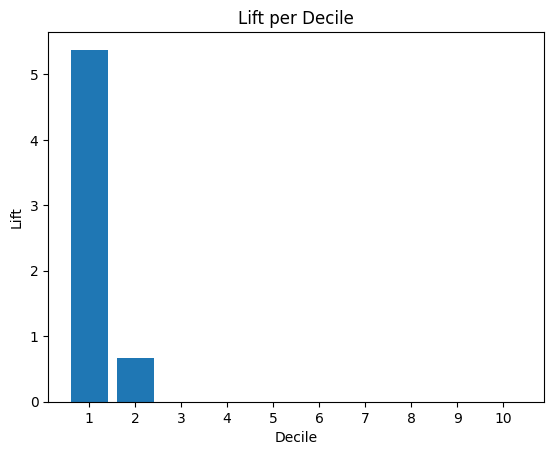

In [25]:
%matplotlib inline
# Create list of decile labels
decile_labels = [str(i+1) for i in range(10)]

# Create bar chart
plt.bar(decile_labels, lifts)

# Add labels and title
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Lift per Decile')

# Display chart
plt.show()

In [26]:
# run model on the whole dataset to predict the voters on which message A will have a positive effect
X = pd.get_dummies(voter_df.drop(['MESSAGE','MSG_A','MSG_B','CAND1_UND', 'CAND1_SD2', 'CAND1_SDA', 'CAND1_LD2', 'CAND1_LDA', 'CAND1_SR2', 'CAND1_SRA', 'CAND1_LRA', 'CAND1_LR2', 'CAND1_SFT', 'CAND2_UND', 'CAND2_SD2', 'CAND2_SDA', 'CAND2_LD2', 'CAND2_LDA', 'CAND2_SR2', 'CAND2_SRA', 'CAND2_LRA', 'CAND2_LR2', 'CAND2_SFT', 'MOVED_RD', 'MOVED_DR', 'MOVED_AW', 'MOVED_U', 'MOVED_AD', 'MOVED_AR', 'MOVED_RDMA', 'MOVED_DRMA', 'MOVED_AWMA', 'MOVED_ADMA', 'MOVED_ARMA', 'MOVED_RDMB', 'MOVED_DRMB', 'MOVED_AWMB', 'MOVED_ADMB', 'MOVED_ARMB', 'VOTER_ID'], axis=1))

In [27]:
voter_df['a_effective'] = dtc.predict(X)

In [28]:
voter_df.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB,a_effective
0,84508,3,0,25,4,0,0,38,39,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,608312,1,0,35,0,0,3,46,46,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,222821,3,0,73,3,0,0,42,36,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,137882,2,0,54,1,1,0,37,34,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,531303,2,0,51,0,3,0,46,46,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [29]:
# run a model for dataset b
X = pd.get_dummies(df_b.drop(['MESSAGE','MSG_A','MSG_B','CAND1_UND', 'CAND1_SD2', 'CAND1_SDA', 'CAND1_LD2', 'CAND1_LDA', 'CAND1_SR2', 'CAND1_SRA', 'CAND1_LRA', 'CAND1_LR2', 'CAND1_SFT', 'CAND2_UND', 'CAND2_SD2', 'CAND2_SDA', 'CAND2_LD2', 'CAND2_LDA', 'CAND2_SR2', 'CAND2_SRA', 'CAND2_LRA', 'CAND2_LR2', 'CAND2_SFT', 'MOVED_RD', 'MOVED_DR', 'MOVED_AW', 'MOVED_U', 'MOVED_AD', 'MOVED_AR', 'MOVED_RDMA', 'MOVED_DRMA', 'MOVED_AWMA', 'MOVED_ADMA', 'MOVED_ARMA', 'MOVED_RDMB', 'MOVED_DRMB', 'MOVED_AWMB', 'MOVED_ADMB', 'MOVED_ARMB', 'b_effective','VOTER_ID'], axis=1))
y = df_b['b_effective']

In [30]:
# partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [31]:
dtc = DecisionTreeClassifier(max_depth = 20, random_state = 1)

In [32]:
# train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=1)

In [33]:
classificationSummary(y_train, dtc.predict(X_train))

Confusion Matrix (Accuracy 0.9513)

       Prediction
Actual     0     1
     0 15206    75
     1   800  1881


In [34]:
classificationSummary(y_valid, dtc.predict(X_valid))

Confusion Matrix (Accuracy 0.7762)

       Prediction
Actual    0    1
     0 8988 1165
     1 1515  308


In [35]:
importances = dtc.feature_importances_

In [36]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':importances})
importance_df = importance_df.sort_values('importance')
print(importance_df)

        feature  importance
104      CAND1S    0.000000
105      CAND2S    0.000000
47         H_M1    0.000108
40     GENDER_F    0.000161
93   RELIGIOUSM    0.000397
..          ...         ...
3         HH_ND    0.028284
103    PRS16_PR    0.065916
102    PRS16_PD    0.072615
86     REG_DAYS    0.105769
2           AGE    0.111809

[112 rows x 2 columns]


In [37]:
# Generate predicted probabilities
y_pred_prob = dtc.predict_proba(X_valid)[:, 1]

In [38]:
# Create dataframe with predicted probabilities and true labels
df = pd.DataFrame({'y_true': y_valid, 'y_pred_prob': y_pred_prob})

In [39]:
# Sort dataframe by predicted probabilities
df = df.sort_values('y_pred_prob', ascending=False)

In [40]:
# Divide dataframe into deciles
n = len(df)
df['decile'] = pd.qcut(range(n), 10, labels=False)

In [41]:
# Calculate lift for each decile
lifts = []
for i in range(10):
    decile = df[df['decile'] == i]
    tn, fp, fn, tp = confusion_matrix(decile['y_true'], decile['y_pred_prob'] > 0.5).ravel()
    true_positive_rate = tp / (tp + fn)
    base_rate = (tp + fn) / (tp + fp + tn + fn)
    lift = true_positive_rate / base_rate
    lifts.append(lift)

# Print the lifts for each decile
print("Lift per decile:", lifts)

Lift per decile: [4.889795918367347, 1.1426970885251857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


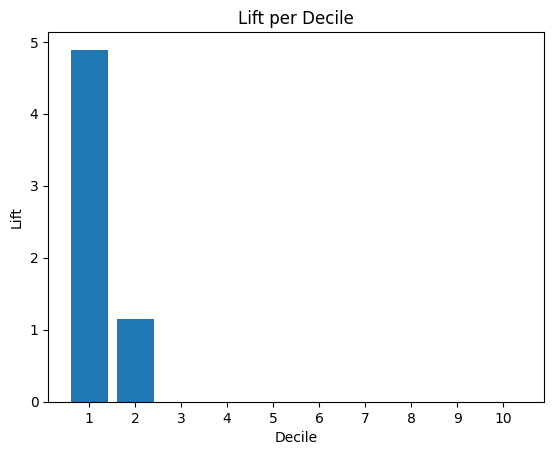

In [42]:
%matplotlib inline
# Create list of decile labels
decile_labels = [str(i+1) for i in range(10)]

# Create bar chart
plt.bar(decile_labels, lifts)

# Add labels and title
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Lift per Decile')

# Display chart
plt.show()

In [43]:
# run model on the whole dataset to predict the voters on which message B will have a positive effect
X = pd.get_dummies(voter_df.drop(['MESSAGE','MSG_A','MSG_B','CAND1_UND', 'CAND1_SD2', 'CAND1_SDA', 'CAND1_LD2', 'CAND1_LDA', 'CAND1_SR2', 'CAND1_SRA', 'CAND1_LRA', 'CAND1_LR2', 'CAND1_SFT', 'CAND2_UND', 'CAND2_SD2', 'CAND2_SDA', 'CAND2_LD2', 'CAND2_LDA', 'CAND2_SR2', 'CAND2_SRA', 'CAND2_LRA', 'CAND2_LR2', 'CAND2_SFT', 'MOVED_RD', 'MOVED_DR', 'MOVED_AW', 'MOVED_U', 'MOVED_AD', 'MOVED_AR', 'MOVED_RDMA', 'MOVED_DRMA', 'MOVED_AWMA', 'MOVED_ADMA', 'MOVED_ARMA', 'MOVED_RDMB', 'MOVED_DRMB', 'MOVED_AWMB', 'MOVED_ADMB', 'MOVED_ARMB', 'VOTER_ID','a_effective'], axis=1))

In [44]:
voter_df['b_effective'] = dtc.predict(X)

In [45]:
voter_df.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB,a_effective,b_effective
0,84508,3,0,25,4,0,0,38,39,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,608312,1,0,35,0,0,3,46,46,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,222821,3,0,73,3,0,0,42,36,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,137882,2,0,54,1,1,0,37,34,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,531303,2,0,51,0,3,0,46,46,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [46]:
voter_df['a_effective'].value_counts()

False    339795
True      45192
Name: a_effective, dtype: int64

In [47]:
voter_df['b_effective'].value_counts()

False    338635
True      46352
Name: b_effective, dtype: int64

In [48]:
output = voter_df[['VOTER_ID','a_effective','b_effective']]

In [49]:
output.to_csv('recommendations.csv', index=False)